## 기본세팅

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

In [35]:
# 돌봄 서비스 플랫폼의 일일 활성 사용자별 시장 점유율
daily_user = {
    '플랫폼명': ['케어네이션 - 간병인용', '케어네이션 - 보호자용', '케어닥 - 보호자용', '좋은케어 - 보호자용', '케어닥 - 간병인용', '토닥씨 - 보호자용', '케어링크 - 보호자용', '헬퍼 - 간병인용', '케어링크 - 매니저용'],
    '시장 점유율(%)': [31, 31, 18, 8, 4, 3, 3, 1, 1]
}
df_daily_user = pd.DataFrame(daily_user)

# 돌봄 서비스 플랫폼 다운로드 수에 따른 시장 점유율
number_of_downloads = {
    '플랫폼명': ['케어네이션 - 보호자용', '케어네이션 - 간병인용', '케어닥 - 보호자용', '케어닥 - 간병인용', '보미쌤 - 보호자용', '토닥씨 - 보호자용', '케어링크 - 간병인용', '헬퍼 - 간병인용'],
    '시장 점유율(%)': [48, 26, 20, 1, 1, 1, 1, 1]
}
df_number_of_downloads = pd.DataFrame(number_of_downloads)

# 돌봄 서비스 플랫폼의 누적 다운로드에 따른 시장 점유율
accumulate_downloads = {
    '플랫폼명': ['케어네이션 - 보호자용', '케어네이션 - 간병인용', '케이닥 - 보호자용', '케어닥 - 간병인용', '좋은케어 - 보호자용', '케어링크 - 간병인용', '헬퍼 - 간병인용'],
    '시장 점유율(%)': [43, 23, 15, 10, 6, 1, 1]
}
df_accumulate_downloads = pd.DataFrame(accumulate_downloads)

# 돌봄 서비스 플랫폼 설치 기반별 시장 점유율
equipment = {
    '플랫폼명': ['케어네이션 - 보호자용', '케어네이션 - 간병인용', '케이닥 - 보호자용', '좋은케어 - 보호자용', '케어닥 - 간병인용', '헬퍼 - 간병인용', '보미쌤 - 보호자용', '보미쌤 - 간병인용', '토닥씨 - 보호자용'],
    '시장 점유율(%)': [34, 13, 13, 10, 10, 5, 5, 5, 5]
}
df_equipment = pd.DataFrame(equipment)

In [27]:
# 돌봄 서비스 플랫폼의 일일 활성 사용자별 시장 점유율
df_daily_user

,플랫폼명,시장 점유율(%)
0,케어네이션 - 간병인용,31
1,케어네이션 - 보호자용,31
2,케어닥 - 보호자용,18
3,좋은케어 - 보호자용,8
4,케어닥 - 간병인용,4
5,토닥씨 - 보호자용,3
6,케어링크 - 보호자용,3
7,헬퍼 - 간병인용,1
8,케어링크 - 매니저용,1


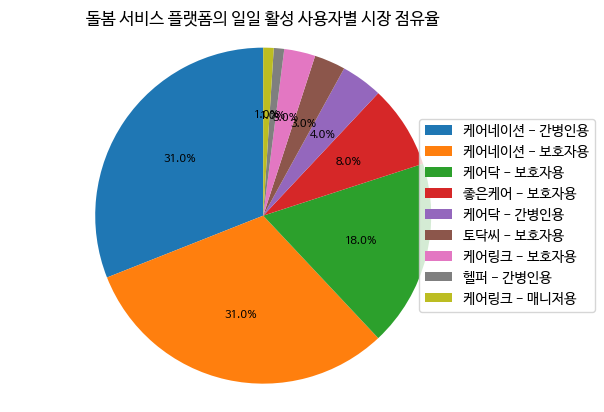

In [41]:
labels = df_daily_user['플랫폼명']
sizes = df_daily_user['시장 점유율(%)']
 
# 파이차트 그리기
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))

# 파이차트 속 글자 크기와 색 조정
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('black')

ax1.axis('equal')  # 원이 타원이 되지 않게 하는 설정
plt.title('돌봄 서비스 플랫폼의 일일 활성 사용자별 시장 점유율')
# 범례 추가 및 위치 조정
plt.legend(labels, loc="center left", bbox_to_anchor=(0.8, 0.5))

plt.show()

In [29]:
# 돌봄 서비스 플랫폼 다운로드 수에 따른 시장 점유율
df_number_of_downloads

,플랫폼명,시장 점유율(%)
0,케어네이션 - 보호자용,48
1,케어네이션 - 간병인용,26
2,케어닥 - 보호자용,20
3,케어닥 - 간병인용,1
4,보미쌤 - 보호자용,1
5,토닥씨 - 보호자용,1
6,케어링크 - 간병인용,1
7,헬퍼 - 간병인용,1


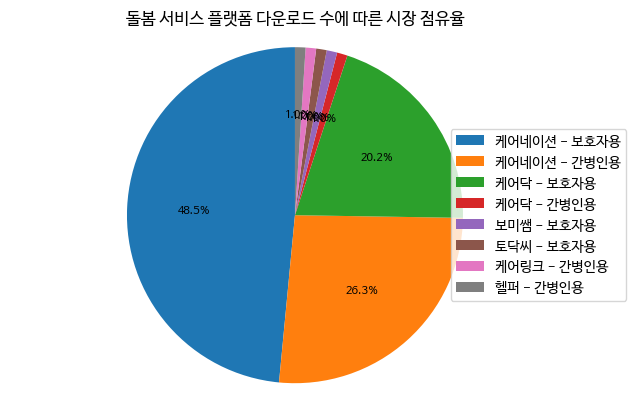

In [44]:
labels = df_number_of_downloads['플랫폼명']
sizes = df_number_of_downloads['시장 점유율(%)']
 
# 파이차트 그리기
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))

# 파이차트 속 글자 크기와 색 조정
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('black')

ax1.axis('equal')
plt.title('돌봄 서비스 플랫폼 다운로드 수에 따른 시장 점유율')
plt.legend(labels, loc="center left", bbox_to_anchor=(0.8, 0.5))

plt.show()

In [31]:
# 돌봄 서비스 플랫폼의 누적 다운로드에 따른 시장 점유율
df_accumulate_downloads

,플랫폼명,시장 점유율(%)
0,케어네이션 - 보호자용,43
1,케어네이션 - 간병인용,23
2,케어닥 - 보호자용,15
3,케어닥 - 간병인용,10
4,좋은케어 - 보호자용,6
5,케어링크 - 간병인용,1
6,헬퍼 - 간병인용,1


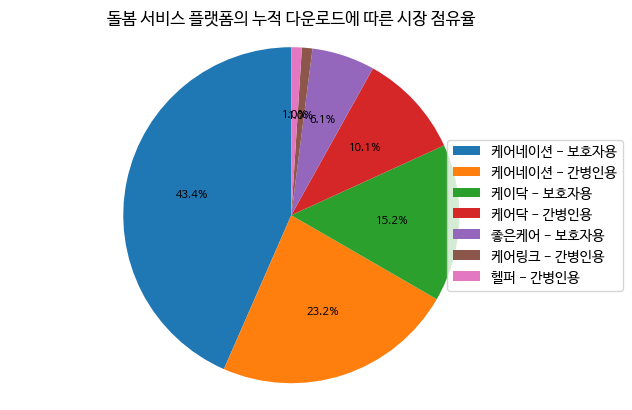

In [45]:
labels = df_accumulate_downloads['플랫폼명']
sizes = df_accumulate_downloads['시장 점유율(%)']
 
# 파이차트 그리기
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))

# 파이차트 속 글자 크기와 색 조정
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('black')

ax1.axis('equal')
plt.title('돌봄 서비스 플랫폼의 누적 다운로드에 따른 시장 점유율')
plt.legend(labels, loc="center left", bbox_to_anchor=(0.8, 0.5))

plt.show()

In [33]:
# 돌봄 서비스 플랫폼 설치 기반별 시장 점유율
df_equipment

,플랫폼명,시장 점유율(%)
0,케어네이션 - 보호자용,34
1,케어네이션 - 간병인용,13
2,케어닥 - 보호자용,13
3,좋은케어 - 보호자용,10
4,케어닥 - 간병인용,10
5,헬퍼 - 간병인용,5
6,보미쌤 - 보호자용,5
7,보미쌤 - 간병인용,5
8,토닥씨 - 보호자용,5


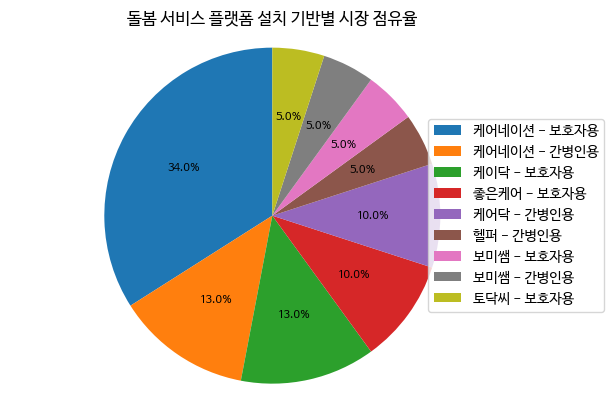

In [46]:
labels = df_equipment['플랫폼명']
sizes = df_equipment['시장 점유율(%)']
 
# 파이차트 그리기
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))

# 파이차트 속 글자 크기와 색 조정
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('black')

ax1.axis('equal')
plt.title('돌봄 서비스 플랫폼 설치 기반별 시장 점유율')
plt.legend(labels, loc="center left", bbox_to_anchor=(0.8, 0.5))

plt.show()

### 네 가지 유형의 시장 점유율에 지속적으로 상위권안에 진입되는 돌봄 서비스 플랫폼 Top 5
1. 케어네이션 - 보호자용
2. 케어네이션 - 간병인용
3. 케어닥 - 보호자용
4. 케어닥 - 간병인용
5. 좋은케어-보호자용